# Análisis de datos

**Andrés Chaparro** 

**Juan Andrés Bernal**



In [6]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,silhouette_samples, silhouette_score

import scipy.stats as stats

# 1. Carga de datos (csv)
Se cargan la base de datos (txt) para trabajar con estos

In [7]:
direccion_B2C_transaccional = 'Datos/base_3_transaccional_b2b.txt'

data_original_B2C_transaccional = pd.read_csv(direccion_B2C_transaccional, sep="\t", encoding='utf-8')

print("\nShape of B2B transactional data:", data_original_B2C_transaccional.shape)



Shape of B2B transactional data: (25866, 10)


In [8]:
data_original_B2C_transaccional.head()

,fecha_factura,id_b2b,municipio,zona,categoria_b2b_macro,categoria_b2b,subcategoria_b2b,producto,valor_total,alineación con portafolio estratégico b2b
0,2007-01-03,B2B_01,MADRID,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_1,1819.931192,0.000216
1,2007-01-03,B2B_01,MADRID,CUNDINAMARCA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_1,Producto_2,1713.359382,0.000077
2,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_2,cat_b2b_3,sub_b2b_3,Producto_4,208.510406,0.000069
3,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_11,Producto_13,3319.449852,0.000308
4,2007-01-04,B2B_02,VILLA DE LEYVA,BOYACA,cat_b2b_macro_1,cat_b2b_1,sub_b2b_12,Producto_14,4945.685288,0.000110


# 2. Entendimientos de los datos 

In [9]:
data_original_B2C_transaccional.describe()

,valor_total,alineación con portafolio estratégico b2b
count,25866.000000,25866.000000
mean,1535.979362,0.000294
std,2257.971976,0.000155
min,5.219884,-0.008032
25%,168.112753,0.000225
50%,525.062748,0.000292
75%,2191.560508,0.000371
max,68751.946040,0.000654


In [10]:
# Para variables numéricas (continuas)
continuous_vars = data_original_B2C_transaccional.select_dtypes(include=['int64', 'float64'])
print(f"Número de variables continuas: {len(continuous_vars.columns)}")

# Para variables categóricas
categorical_vars = data_original_B2C_transaccional.select_dtypes(include=['object', 'category'])
print(f"Número de variables categóricas: {len(categorical_vars.columns)}")

# Para mostrar cuáles son las variables categóricas
print("\nVariables categóricas:")
for col in categorical_vars.columns:
    unique_values = len(data_original_B2C_transaccional[col].unique())
    print(f"- {col}: {unique_values} categorías únicas")

Número de variables continuas: 2
Número de variables categóricas: 8

Variables categóricas:
- fecha_factura: 1027 categorías únicas
- id_b2b: 6 categorías únicas
- municipio: 5 categorías únicas
- zona: 3 categorías únicas
- categoria_b2b_macro: 31 categorías únicas
- categoria_b2b: 49 categorías únicas
- subcategoria_b2b: 139 categorías únicas
- producto: 2564 categorías únicas


### 2.1 Datos Nulos

In [11]:
features = data_original_B2C_transaccional.columns
print("\nCantidad de datos nulos:")
data_original_B2C_transaccional[features].isnull().sum() 


Cantidad de datos nulos:


fecha_factura                                0
id_b2b                                       0
municipio                                    0
zona                                         0
categoria_b2b_macro                          0
categoria_b2b                                0
subcategoria_b2b                             0
producto                                     0
valor_total                                  0
alineación con portafolio estratégico b2b    0
dtype: int64

In [12]:
print("\nPorcentaje de datos nulos:")
data_original_B2C_transaccional[features].isnull().sum() /data_original_B2C_transaccional.shape[0] * 100


Porcentaje de datos nulos:


fecha_factura                                0.0
id_b2b                                       0.0
municipio                                    0.0
zona                                         0.0
categoria_b2b_macro                          0.0
categoria_b2b                                0.0
subcategoria_b2b                             0.0
producto                                     0.0
valor_total                                  0.0
alineación con portafolio estratégico b2b    0.0
dtype: float64

### 2.2 Histograma de los datos

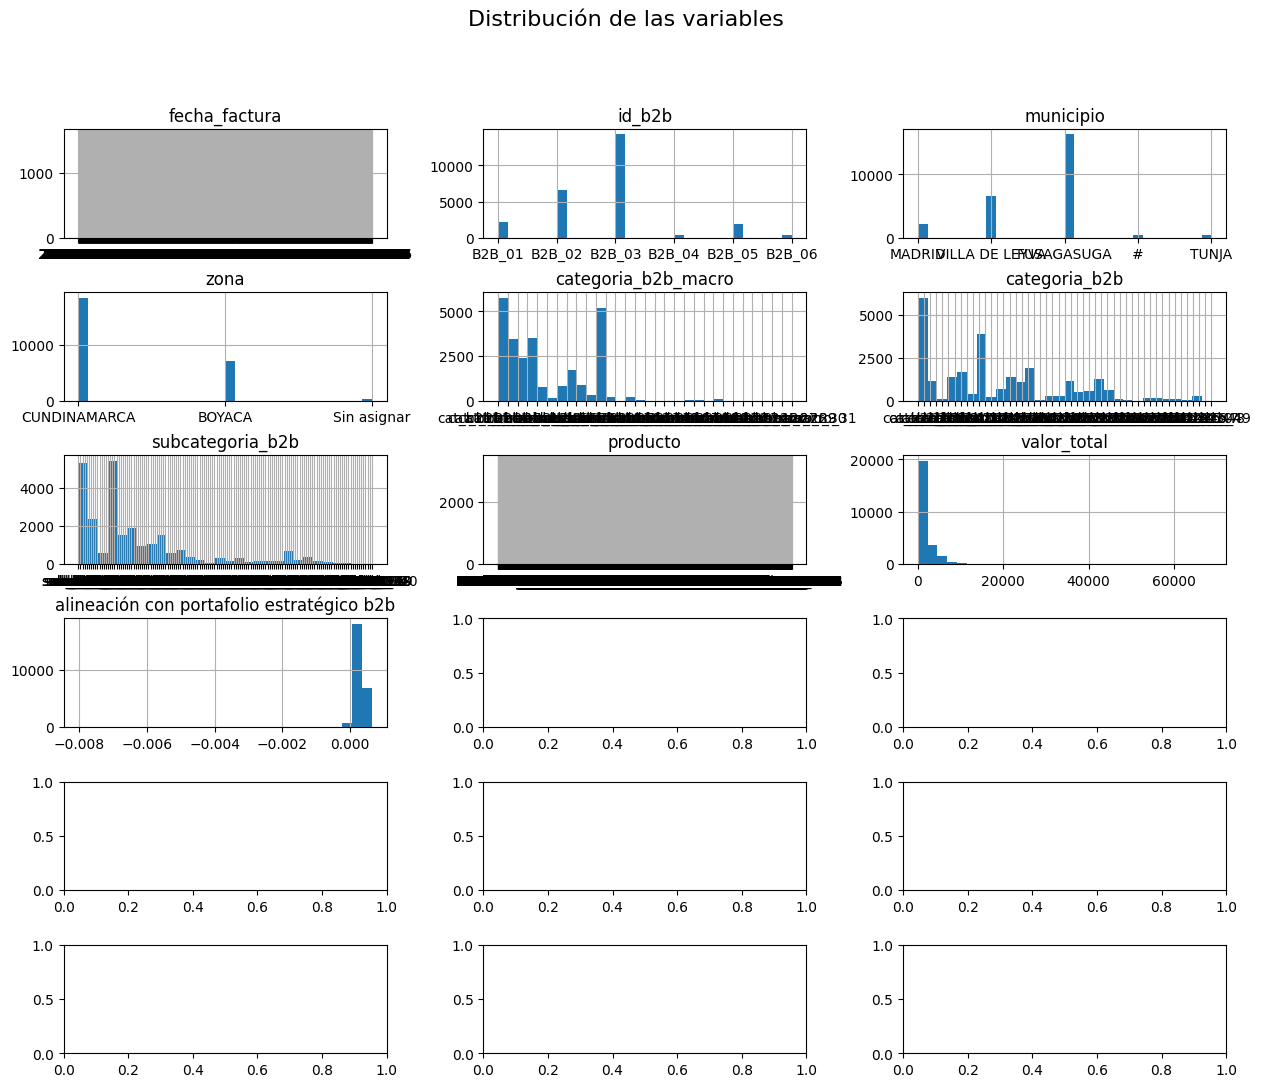

In [13]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 12))  # 6 filas, 3 columnas
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Ajusta el espacio entre gráficos
# Iterar sobre cada variable y graficarla en el subplot correspondiente
for ax, col in zip(axes.flat, data_original_B2C_transaccional.columns):
    data_original_B2C_transaccional[col].hist(ax=ax, bins=30)
    ax.set_title(col)

plt.suptitle("Distribución de las variables", fontsize=16)
plt.show()


### 2.3 HeatMap de Correlaciones

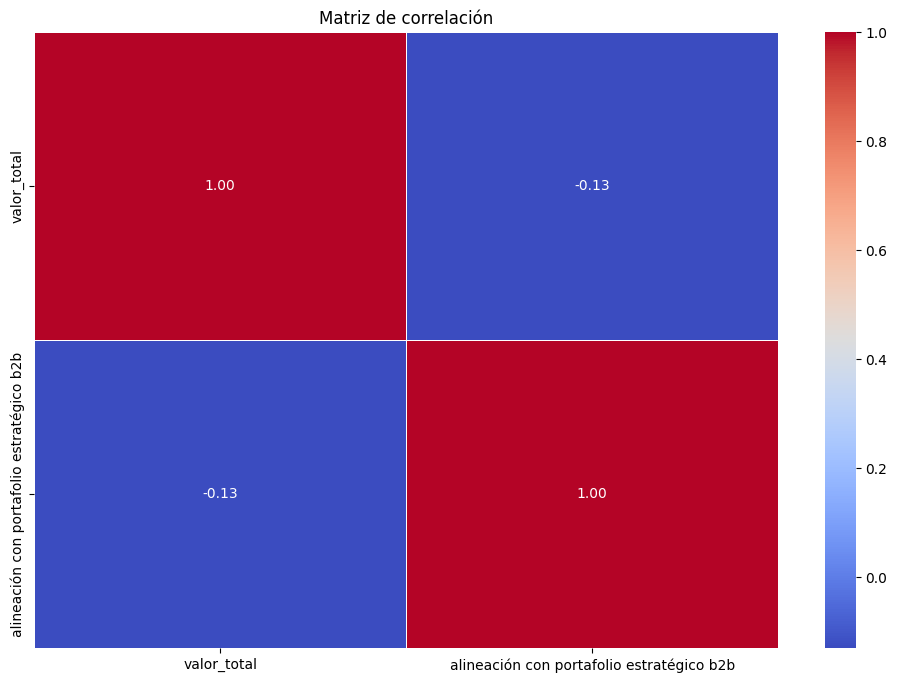

In [14]:
numeric_columns = data_original_B2C_transaccional.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(data_original_B2C_transaccional[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()
